In [1]:
import time

from tqdm import tqdm
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from get_randoms import *

import warnings
warnings.filterwarnings(action='ignore')

<!-- 사용한 알고리즘: **Linear congruential generator**  

    Recurrence Relation: Xn+1 = (a * Xn + c) % m
    c: increment, a: multiplier, m: modulus
    
    * 주기가 최대가 되기위한 계수 조건 *
        - c와 n은 서로소 (0<= c < n) 
        - m이 4의 배수이면 a-1도 4의 배수
        - a-1은 m의 모든 소인수*로 나누어 떨어짐
          * 연산 시간 문제와 계수 예측을 막기 위해 소인수 전체집합의 부분집합의 곱으로 설정함
          (get_1_or_0 함수를 통해 랜덤하게 구함) -->

# Random Generator Test

In [2]:
print(
    """
    참조한 알고리즘: Linear congruential generator
    : 점화식 및 modulus 연산을 통한 난수 생성 알고리즘

    Recurrence Relation: Xn+1 = (a * Xn + c) % m
      (c: increment, a: multiplier, m: modulus)
      
    * 주기가 최대가 되기위한 계수 조건 * 
      - c와 n은 서로소 (0<= c < n) 
      - m이 4의 배수이면 a-1도 4의 배수
      - a-1은 m의 모든 소인수*로 나누어 떨어짐
        * 연산 시간 문제와 계수 예측을 막기 위해 소인수 전체집합의 부분집합의 곱으로 설정함
        (get_1_or_0 함수를 통해 랜덤하게 구함)
    """
)


    참조한 알고리즘: Linear congruential generator
    : 점화식 및 modulus 연산을 통한 난수 생성 알고리즘

    Recurrence Relation: Xn+1 = (a * Xn + c) % m
      (c: increment, a: multiplier, m: modulus)
      
    * 주기가 최대가 되기위한 계수 조건 * 
      - c와 n은 서로소 (0<= c < n) 
      - m이 4의 배수이면 a-1도 4의 배수
      - a-1은 m의 모든 소인수*로 나누어 떨어짐
        * 연산 시간 문제와 계수 예측을 막기 위해 소인수 전체집합의 부분집합의 곱으로 설정함
        (get_1_or_0 함수를 통해 랜덤하게 구함)
    


## Test 1: Uniformity
---
**균일성 테스트**

In [3]:
print(
    """
    지정한 n값에 대해 100000회 난수생성을 반복하여 균일성 및 분포를 테스트합니다.
    """
)


    지정한 n값에 대해 100000회 난수생성을 반복하여 균일성 및 분포를 테스트합니다.
    


**테스트 조건**

In [4]:
ints = 2 ** 12 - 1
iters = 100000

print(
    f"""
    Input Integer(n): {ints}\n\
    iteration counts: {iters}\n\
    """
)


    Input Integer(n): 4095
    iteration counts: 100000
    


In [5]:
def get_random_test(integer: int, iterations:int = None) -> list:
    
    st = time.time()
    rand_n, _randoms, seed, a, factors, c, coprimes = get_random(integer, iterations)
    elapsed = round((time.time() - st) * 1000, 3)
    
    return [integer, rand_n, seed, a, c, elapsed]

**테스트 소요 시간**

In [6]:
data = []
for i in tqdm(range(iters)):
    _data = get_random_test(ints)
    data.append(_data)

100%|██████████| 100000/100000 [00:06<00:00, 16664.84it/s]


In [7]:
columns = ['number', 'random_number', 'seed', 'multiplier', 'increment', 'elapsed_time']
test_df = pd.DataFrame(data, columns=columns)
test_df.to_csv('test_data_2.csv', index=False)

In [8]:
grps = ['seed', 'multiplier', 'increment']
test_grp_df = test_df.groupby(grps).count().loc[:, ['random_number']]
test_grp_df.to_csv('test_grouping_data_2.csv')

### 결과 통계 데이터

In [9]:
randint_mean = round(test_df.random_number.mean(), 3)
randint_max = test_df.random_number.max()
randint_min = test_df.random_number.min()
randint_std = round(test_df.random_number.std(), 3)

# randint_mean, randint_max, randint_min, randint_std

print(
    f"""
    - Mean: {randint_mean}\n\
    - Max: {randint_max}\n\
    - Min: {randint_min}\n\
    - Std: {randint_std}\
"""
)


    - Mean: 2071.48
    - Max: 4095
    - Min: 0
    - Std: 1172.758


### 결과 데이터 다운로드
- [All Data Download](test_data_2.csv)

- [Grouping Data Download](test_grouping_data_2.csv)

In [10]:
# test_df.groupby('random_number').count()

In [11]:
# test_df.groupby('multiplier').count().loc[:, ['random_number']]

In [12]:
# test_df.groupby('increment').count().loc[:, ['random_number']]

In [13]:
# test_df.groupby('elapsed_time').count()

In [14]:
print("\n\n\n\n")

## Histogram & Kernel Density

### Random Number
---

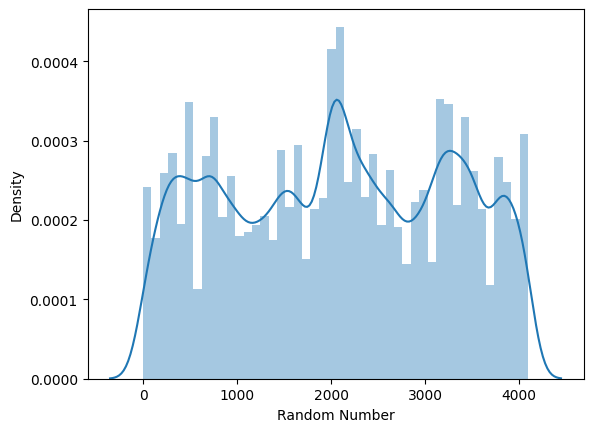

In [15]:
data_df = test_df.loc[:, ['random_number']]
ax = sns.distplot(data_df)
ax.set(xlabel='Random Number', ylabel='Density')
plt.show()

### Seed Value
---

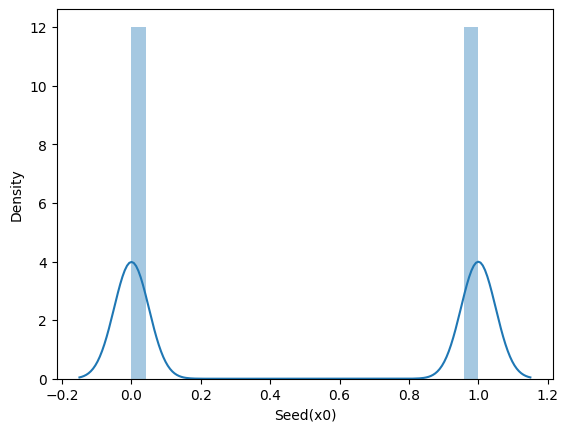

In [16]:
data_df = test_df.loc[:, ['seed']]
ax = sns.distplot(data_df)
ax.set(xlabel='Seed(x0)', ylabel='Density')
plt.show()

In [17]:
# print("\n\n")

### Multiplier(a)
---

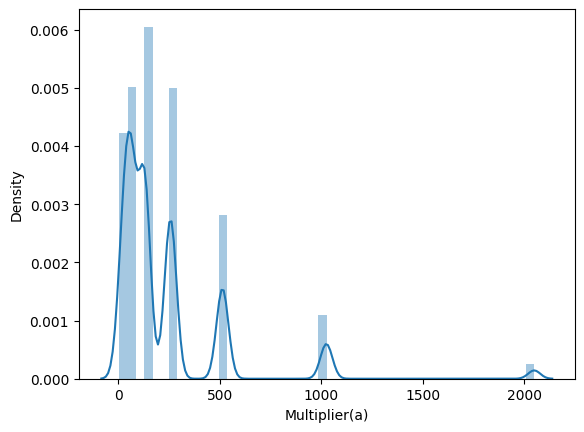

In [18]:
data_df = test_df.loc[:, ['multiplier']]
ax = sns.distplot(data_df)
ax.set(xlabel='Multiplier(a)', ylabel='Density')
plt.show()

### Increment(c)
---

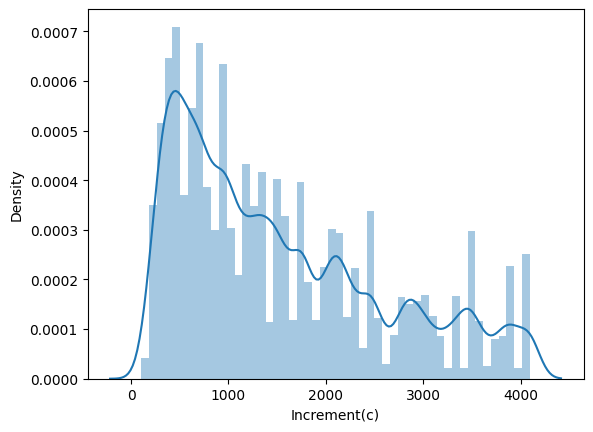

In [19]:
data_df = test_df.loc[:, ['increment']]
ax = sns.distplot(data_df)
ax.set(xlabel='Increment(c)', ylabel='Density')
plt.show()

### Elapsed Time
---

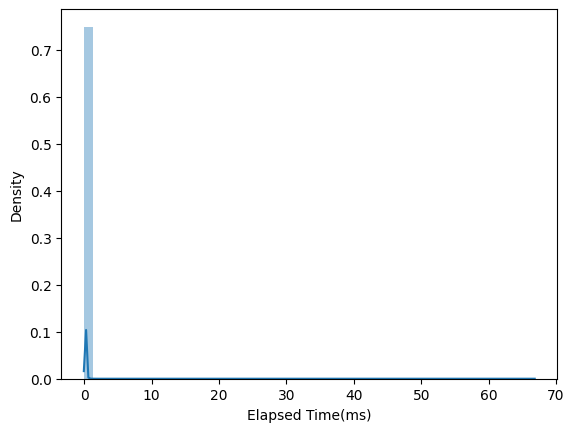

In [20]:
data_df = test_df.loc[:, ['elapsed_time']]
ax = sns.distplot(data_df)
ax.set(xlabel='Elapsed Time(ms)', ylabel='Density')
plt.show()

In [23]:
import pdfkit
pdfkit.from_file('test_2.html', 'test_2.pdf')

True